In [1]:
import pandas as pd
import requests

In [2]:
link_market = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=402835223&single=true&output=csv"
link_comtrade = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=1478437350&single=true&output=csv"
init_data_market = pd.read_csv(link_market)
init_data_comtrade = pd.read_csv(link_comtrade)

In [3]:
init_data_market.head(3)

,name,n_requests,n_show,n_click,m2017,f2017,m1998,m1999,m2000,m2001,...,f2007,f2008,f2009,f2010,f2011,f2012,f2013,f2014,f2015,f2016
0,Алюминий,12448314,3122496,21441,120949088000,19497,37335426000,39857568000,47510216000,45810603000,...,10001,12044,13284,12801,13400,17291,16791,19749,23754,22631
1,Апельсины,11962969,3787067,17232,68059088660,24096,33980122620,34153638120,29949397560,48134929440,...,11709,15309,15187,16516,17895,21122,21868,33189,38110,34898
2,Арахис,2359926,668376,3088,108226207717,218,60720833496,52724617953,59478588181,62719498284,...,63,81,95,77,103,96,160,127,250,260


In [4]:
init_data_comtrade.head(3)

,name,n_requests,n_show,n_click,c2018,f2018,c_sum,f_sum,c1990,c1991,...,f2008,f2009,f2010,f2011,f2012,f2013,f2014,f2015,f2016,f2017
0,Абрикосы,6531073,1459083,11027,14035510720,487,185640751374,13794,1020836688,1516496916,...,623,602,624,781,742,860,1108,1325,1273,881
1,Авокадо,11901576,4380473,33080,11500179371,2127,83757257927,28156,94171803,138904464,...,787,708,801,1266,1472,1832,2589,3631,3579,4411
2,Алюминий,12448314,3122496,21441,8324509939,22902,109172522796,270198,642699374,1268714455,...,13327,15183,13843,14732,18725,18203,21410,25440,24313,20925


Leave meaningful variables and data and gain new

In [5]:
init_data_market['m_bef_2008'] = init_data_market[['m1998', 'm1999', 'm2000', 'm2001', 'm2002', 'm2003',
                                                   'm2004', 'm2005', 'm2006', 'm2007', 'm2008']].sum(axis = 1)
init_data_market['f_bef_2008'] = init_data_market[['f1998', 'f1999', 'f2000', 'f2001', 'f2002', 'f2003',
                                                   'f2004', 'f2005', 'f2006', 'f2007', 'f2008']].sum(axis = 1)
init_data_market['m_af_2008'] = init_data_market[['m2009', 'm2010', 'm2011', 'm2012', 'm2013', 'm2014',
                                                   'm2015', 'm2016']].sum(axis = 1)
init_data_market['f_af_2008'] = init_data_market[['f2009', 'f2010', 'f2011', 'f2012', 'f2013', 'f2014',
                                                   'f2015', 'f2016']].sum(axis = 1)

In [6]:
init_data_comtrade['c_bef_2008'] = init_data_comtrade[['c1990', 'c1991', 'c1992', 'c1993', 'c1994', 'c1995',
                                                       'c1996', 'c1997','c1998', 'c1999', 'c2000', 'c2001',
                                                       'c2002', 'c2003','c2004', 'c2005', 'c2006', 'c2007', 'c2008'
                                                      ]].sum(axis = 1)
init_data_comtrade['f_bef_2008'] = init_data_comtrade[['f1990','f1991', 'f1992', 'f1993', 'f1994', 'f1995', 'f1996',
                                                       'f1997','f1998', 'f1999', 'f2000', 'f2001', 'f2002', 'f2003',
                                                   'f2004', 'f2005', 'f2006', 'f2007', 'f2008']].sum(axis = 1)
init_data_comtrade['c_af_2008'] = init_data_comtrade[['c2009', 'c2010', 'c2011', 'c2012', 'c2013', 'c2014',
                                                   'c2015', 'c2016', 'c2017']].sum(axis = 1)
init_data_comtrade['f_af_2008'] = init_data_comtrade[['f2009', 'f2010', 'f2011', 'f2012', 'f2013', 'f2014',
                                                   'f2015', 'f2016', 'f2017']].sum(axis = 1)

In [7]:
data_market = init_data_market[['name', 'n_requests', 'n_show', 'n_click', 'm2017', 'f2017', 'm_bef_2008',
                               'f_bef_2008', 'm_af_2008', 'f_af_2008']]
data_comtrade = init_data_comtrade[['name', 'n_requests', 'n_show', 'n_click', 'c2018', 'f2018', 'c_bef_2008',
                                   'f_bef_2008', 'c_af_2008', 'f_af_2008']]

Correlations

In [8]:
data_market_corr = data_market.copy(deep = True)
data_market_corr.rename(columns = {'n_requests':'Число запросов',
                                   'n_show':'Число показов',
                                   'n_click':'Число кликов',
                                   'm2017':'Объем рынка, 2017 г.',
                                   'f2017':'Частота встречаемости термина, 2017 г.',
                                  'm_bef_2008':'Суммарный объем рынка до 2008 г.',
                                   'f_bef_2008':'Суммарная частота встречаемости до 2008 г.',
                                   'm_af_2008':'Суммарный объем рынка 2009 - 2016 гг.',
                                   'f_af_2008':'Суммарная частота встречаемости 2009 - 2016 гг.'}, inplace = True)

data_comtrade_corr = data_comtrade.copy(deep = True)
data_comtrade_corr.rename(columns = {'n_requests':'Число запросов',
                                     'n_show':'Число показов',
                                     'n_click':'Число кликов',
                                     'c2018':'Сумма экспорта и импорта, 2018 г.',
                                     'f2018':'Частота встречаемости термина, 2018 г.',
                                     'c_bef_2008':'Сумма экспора и иморта до 2008 г.',
                                     'f_bef_2008':'Суммарная частота встречаемости до 2008 г.',
                                     'c_af_2008':'Сумма экспора и иморта до 2009-2017 гг.',
                                     'f_af_2008':'Суммарная частота встречаемости 2009 - 2017 гг.'}, inplace = True)


In [9]:
data_market_corr

,name,Число запросов,Число показов,Число кликов,"Объем рынка, 2017 г.","Частота встречаемости термина, 2017 г.",Суммарный объем рынка до 2008 г.,Суммарная частота встречаемости до 2008 г.,Суммарный объем рынка 2009 - 2016 гг.,Суммарная частота встречаемости 2009 - 2016 гг.
0,Алюминий,12448314,3122496,21441,120949088000,19497,698058866000,60848,718721402500,139701
1,Апельсины,11962969,3787067,17232,68059088660,24096,592896418690,76370,534813026480,198785
2,Арахис,2359926,668376,3088,108226207717,218,691604032342,454,763664400483,1168
3,Арахисовое масло,99119,41467,277,10229837223,32,113972113104,103,100223286103,239
4,Говядина,17920974,10975705,62700,329961030410,24854,1910535112370,65006,2203952925750,162342
5,Золото,44395207,19875807,140208,125527995466,78139,434438757911,203625,922240791146,624616
6,Какао,6889253,2614132,13911,10870319900,942,75948675990,4585,101445381680,7282
7,Кокосовое масло,2815793,1865165,8957,25099327340,1034,29939621761,533,43008426401,3941
8,Маис,263234,21021,156,244073442574,1834,1364232928122,4520,2106780425542,12346
9,Медь,13922919,3414103,21230,132949893500,25503,699400729000,65855,1093520396000,179450


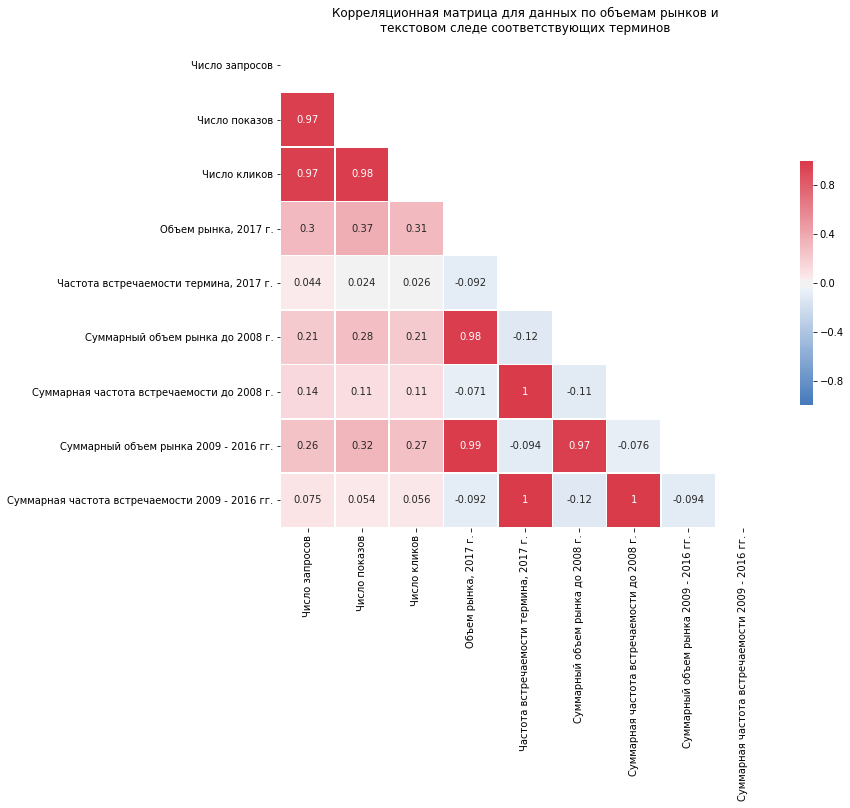

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="white")

corr = data_market_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 9, as_cmap=True, center="light")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Корреляционная матрица для данных по объемам рынков и\nтекстовом следе соответствующих терминов")
plt.show()

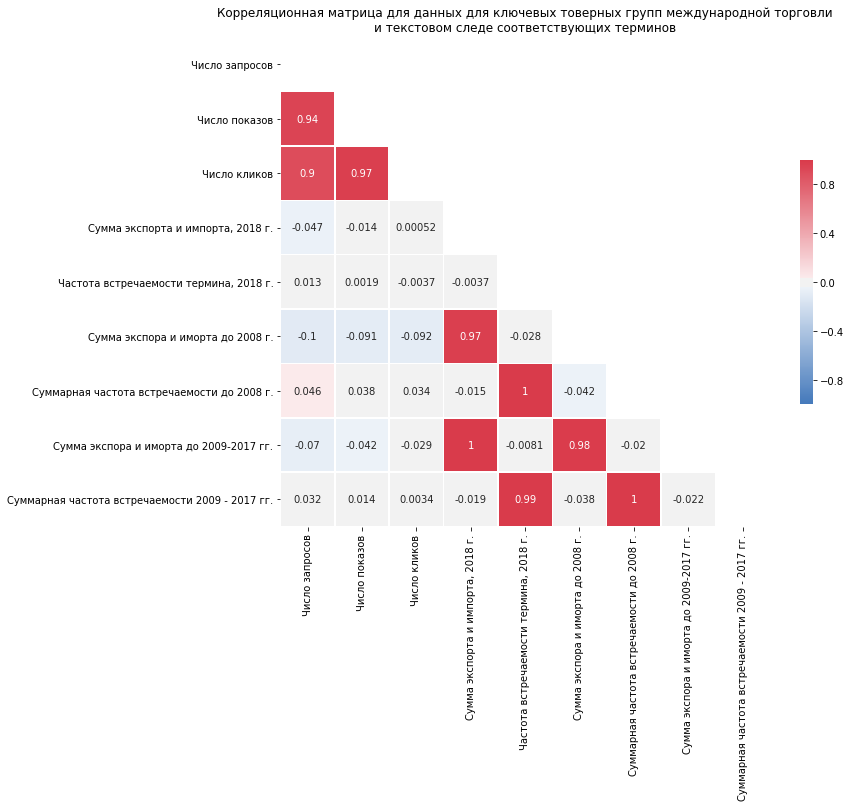

In [30]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_comtrade_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 9, as_cmap=True, center="light")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Корреляционная матрица для данных для ключевых товерных групп международной торговли\nи текстовом следе соответствующих терминов")
plt.show()

In [12]:
#light version

# from string import ascii_letters
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# corr = data_market.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(250, 10, as_cmap=True, center="light")
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
# plt.show()

# Работа с данными по объемам рынков (визуализации)

In [13]:
data_market.head()

,name,n_requests,n_show,n_click,m2017,f2017,m_bef_2008,f_bef_2008,m_af_2008,f_af_2008
0,Алюминий,12448314,3122496,21441,120949088000,19497,698058866000,60848,718721402500,139701
1,Апельсины,11962969,3787067,17232,68059088660,24096,592896418690,76370,534813026480,198785
2,Арахис,2359926,668376,3088,108226207717,218,691604032342,454,763664400483,1168
3,Арахисовое масло,99119,41467,277,10229837223,32,113972113104,103,100223286103,239
4,Говядина,17920974,10975705,62700,329961030410,24854,1910535112370,65006,2203952925750,162342


Наблюдаются соотношения между объемом рынков в последнем периоде (2017 г.) и суммарными объемами рынка до и после финансового кризиса 2008 года.

Для прочих рассматриваемых показателей нельзя сделать аналогичные выводы - их значения не согласуются с показателями объемов рынков соответствующих товаров.

In [14]:
data_market.head(1)

,name,n_requests,n_show,n_click,m2017,f2017,m_bef_2008,f_bef_2008,m_af_2008,f_af_2008
0,Алюминий,12448314,3122496,21441,120949088000,19497,698058866000,60848,718721402500,139701


In [15]:
data_market_corr.head(1)

,name,Число запросов,Число показов,Число кликов,"Объем рынка, 2017 г.","Частота встречаемости термина, 2017 г.",Суммарный объем рынка до 2008 г.,Суммарная частота встречаемости до 2008 г.,Суммарный объем рынка 2009 - 2016 гг.,Суммарная частота встречаемости 2009 - 2016 гг.
0,Алюминий,12448314,3122496,21441,120949088000,19497,698058866000,60848,718721402500,139701


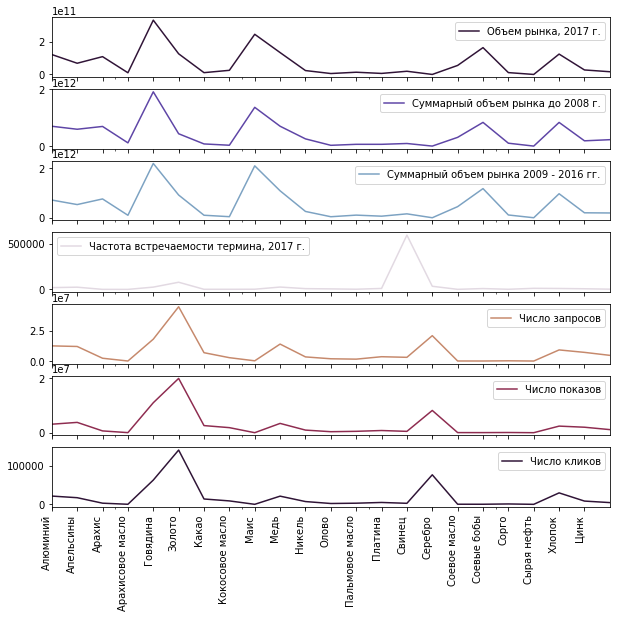

In [16]:
data_market_corr.plot(y = ["Объем рынка, 2017 г.", "Суммарный объем рынка до 2008 г.", "Суммарный объем рынка 2009 - 2016 гг.",
                      "Частота встречаемости термина, 2017 г.", "Число запросов", "Число показов", "Число кликов"],
                 x = "name", subplots=True, figsize=(10,10),
                colormap="twilight_shifted")
a = list(range(22))
plt.xticks(a, list(data_market.name.unique()), rotation='vertical')
plt.xlabel("")
plt.show()

In [17]:
# data_market.plot(y = ["m2017", "m_bef_2008", "m_af_2008",
#                       "f2017", "n_requests", "n_show", "n_click"],
#                  x = "name", subplots=True, figsize=(10,10),
#                 colormap="twilight_shifted")
# a = list(range(22))
# plt.xticks(a, list(data_market.name.unique()), rotation='vertical')
# plt.show()

Визуализация данных в едином масштабе

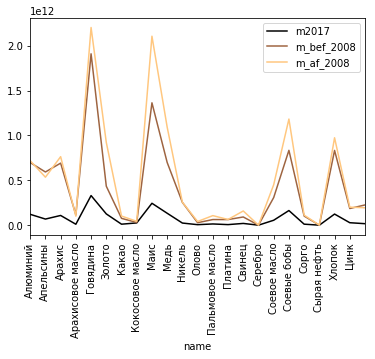

In [18]:
data_market.plot(y = ["m2017", "m_bef_2008", "m_af_2008", ], x = "name", colormap="copper")
a = list(range(22))
plt.xticks(a, list(data_market.name.unique()), rotation='vertical')
plt.show()

In [19]:
data_market.head(3)

,name,n_requests,n_show,n_click,m2017,f2017,m_bef_2008,f_bef_2008,m_af_2008,f_af_2008
0,Алюминий,12448314,3122496,21441,120949088000,19497,698058866000,60848,718721402500,139701
1,Апельсины,11962969,3787067,17232,68059088660,24096,592896418690,76370,534813026480,198785
2,Арахис,2359926,668376,3088,108226207717,218,691604032342,454,763664400483,1168


In [20]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [21]:
mod = sm.OLS(data_market.m2017, data_market.n_show)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  m2017   R-squared:                   22144.914
Model:                            OLS   Adj. R-squared:              23151.455
Method:                 Least Squares   F-statistic:                    -22.00
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               1.00
Time:                        22:12:20   Log-Likelihood:                -612.77
No. Observations:                  23   AIC:                             1228.
Df Residuals:                      22   BIC:                             1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
n_show      1.213e+04   3632.422      3.341      0.0

In [22]:
linear_regressor = LinearRegression(fit_intercept = True)
fitt = linear_regressor.fit(data_market[['n_show']], data_market[['m2017']])
Y_pred = linear_regressor.predict(data_market[['n_show']])
linear_regressor.score(data_market[['n_show']], data_market[['m2017']])

0.1389716649574202

In [23]:
unique_items = data_market.name.unique()

In [27]:
r2_ = r2_score(data_market[['m2017']], Y_pred)
r2_

0.1389716649574202

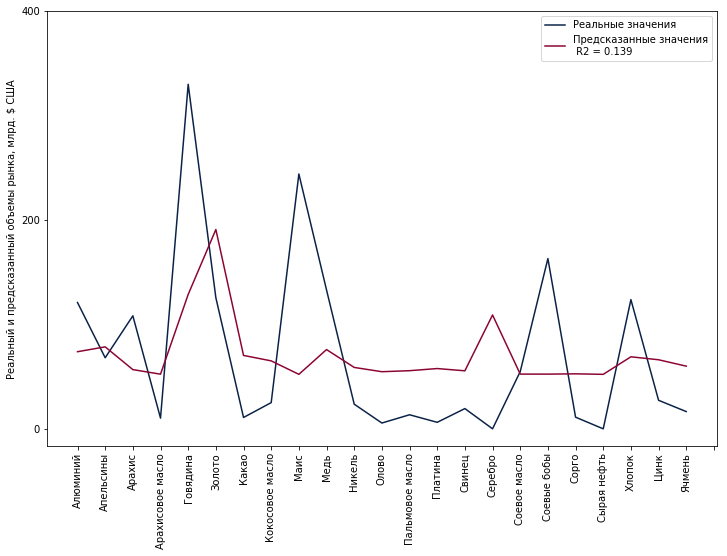

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(24))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(data_market[['m2017']], color = "#0b2247")
plot2, = plt.plot(Y_pred, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**11, 4*10**11]
labels = [0, 200, 400]
plt.yticks(values, labels)
plt.ylabel("Реальный и предсказанный объемы рынка, млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения\n R2 = {r2_:.3}"])
plt.show()
